In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
print (data.feature_names)
print (data.target_names)

df = pd.DataFrame(data.data, columns=data.feature_names) # Cria o dataframe de atributos
df['MedHouseValue'] = data.target # Define o atributo alvo

df.head()

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
['MedHouseVal']


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
# Recorte do dataframe para exercício

sample_df = df.sample(n=500, random_state=42)

# Selecionar X e y
#X = selected_df.iloc[:, :-1]  # Todas as colunas menos a última
X = sample_df[["MedInc"]]  # Apenas "MedInc" para facilitar a visualização
y = sample_df.iloc[:, -1]   # Apenas a última coluna
print(X.shape)
# Dividir os dados em conjuntos de treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar um modelo de Regressão Linear
model = LinearRegression()  # Instanciar o modelo
model.fit(X_train, y_train)  # Treinar o modelo com os dados de treino

# Fazer previsões no conjunto de teste
yhat = model.predict(X_test)

(500, 1)


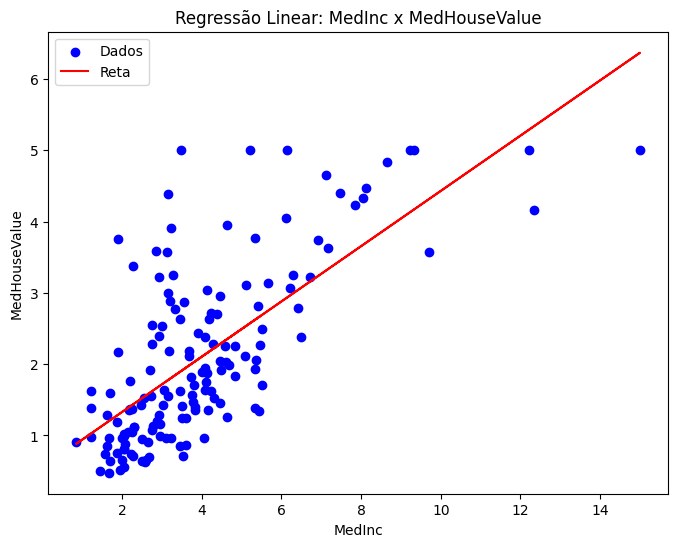

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color="blue", label="Dados")
plt.plot(X_test.to_numpy(), yhat, color="red", label="Reta")  # Previsões do modelo
plt.xlabel("MedInc")
plt.ylabel("MedHouseValue")
plt.title("Regressão Linear: MedInc x MedHouseValue")
plt.legend()
plt.show()

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Erro Absoluto Médio (MAE):
# Mede o erro médio absoluto entre os valores previstos e os reais.
# É fácil de interpretar, pois mantém a mesma unidade do valor de saída (y).
# Valor ideal: MAE próximo de 0 (indica que as previsões estão muito próximas dos valores reais).
mae = mean_absolute_error(y_test,yhat)  

# Erro Quadrático Médio (MSE):
# Mede o erro médio quadrático entre os valores previstos e os reais.
# Penaliza erros maiores de forma mais severa (devido à elevação ao quadrado).
# Valor ideal: MSE próximo de 0. Quanto menor, melhor.
mse = mean_squared_error(y_test,yhat)  

# Raiz do Erro Quadrático Médio (RMSE):
# É a raiz quadrada do MSE. Mede o erro médio, mantendo a unidade de saída (y).
# Ideal para interpretar o erro médio em problemas práticos.
# Valor ideal: RMSE próximo de 0, semelhante ao MAE.
rmse = np.sqrt(mse)               

# coeficiente de determinação:
# Mede a proporção da variância nos dados reais que é explicada pelo modelo.
# Valor ideal: R² próximo de 1.0 (indica um ótimo ajuste).
# Se R² < 0, significa que o modelo é pior que a média simples dos dados.
r2 = r2_score(y_test, yhat) 
print(f"R² = {r2:.3f}\nMAE = {mae:.3f}\nMSE = {mse:.3f}\nRMSE = {rmse:.3f}")

# Mostrar os coeficientes do modelo
print("\nCoeficientes do Modelo:")
coef_df = pd.DataFrame({
    'Variável': X.columns, 
    'Intercept': model.intercept_, # w0
    'Coeficiente': model.coef_ # mostra os pesos ou coeficientes das variáveis independentes
})
print(coef_df)



R² = 0.508
MAE = 0.676
MSE = 0.747
RMSE = 0.864

Coeficientes do Modelo:
  Variável  Intercept  Coeficiente
0   MedInc   0.553232     0.387736


In [11]:
# Fazer uma previsão para novos dados
novo_dado = np.array([[40, 5, 2]])  # age=40, cômodos=5, quartos=2
previsao = model.predict(novo_dado)
print(f"\nPreço previsto para casa com {novo_dado[0, 0]} anos, média de {novo_dado[0, 1]} cômodos e média de {novo_dado[0, 2]} quartos: R$ {previsao[0]*1000:.2f}")


Preço previsto para casa com 40 anos, média de 5 cômodos e média de 2 quartos: R$ 580.67


c:\Users\oalbu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
